In [1]:
#Import libraries
import numpy as np
import pandas as pd

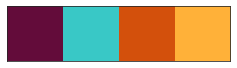

In [2]:
#Import data visualizers
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [3]:
#Import dataseet with pandas
data = pd.read_csv('data.csv')
#Display data - unfiltered
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [4]:
#Display all columns and their value types
#All entries are not null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
#Top 5 most popular artists in Spotify's database 1921-2020
s = data.groupby("artists")["popularity"].sum().sort_values(ascending = False).head()
s

artists
['The Beatles']           19218
['Frank Sinatra']         17987
['Elvis Presley']         17188
['The Rolling Stones']    16477
['Fleetwood Mac']         15675
Name: popularity, dtype: int64

In [10]:
features = data[['danceability', 'liveness', 'acousticness', 'loudness', 'speechiness', 'valence', 'energy']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002889AB3BD48>,
      dtype=object)

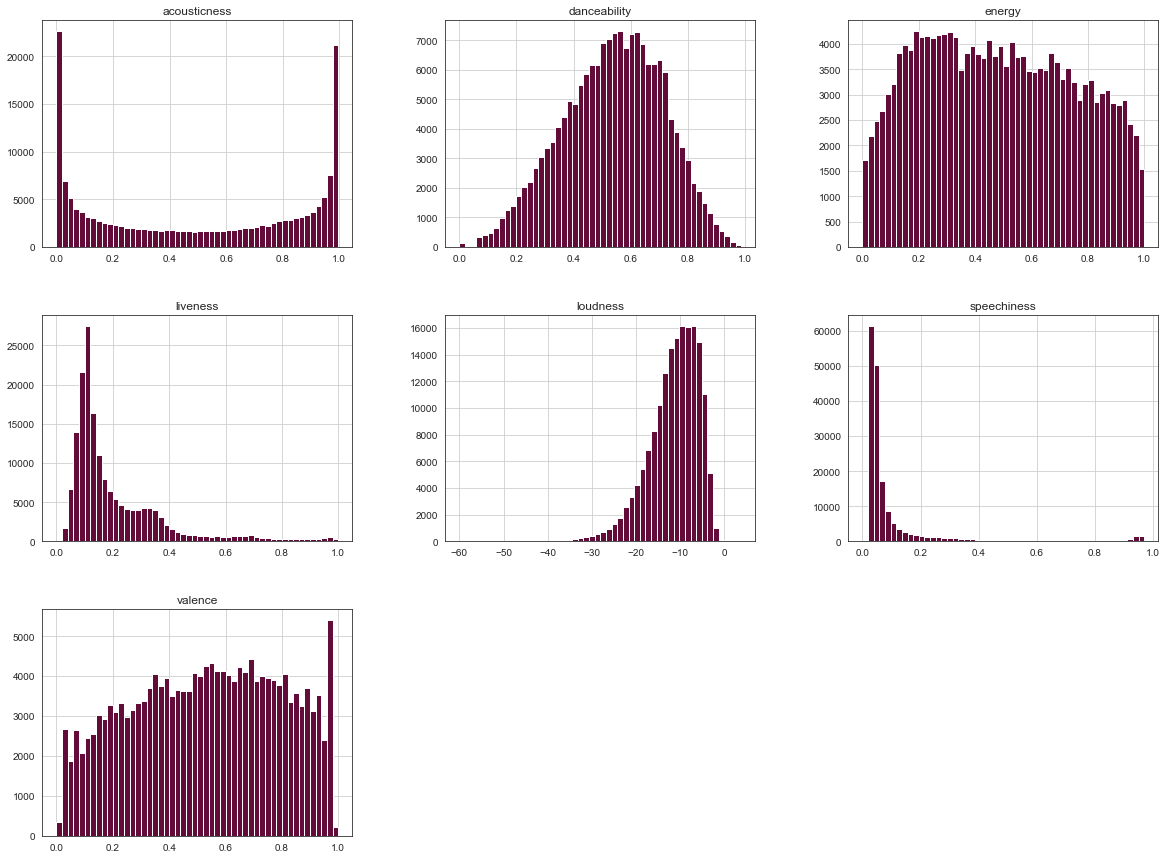

In [11]:
from sklearn import preprocessing
loudness = features[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
data['loudness'] = pd.DataFrame(loudness_scaled)

features.hist(bins=50,figsize=(20,15))

In [15]:
from sklearn.cluster import KMeans
sse = {}
K = range(1, 12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse[k]=km.inertia_

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels=kmeans.labels_

In [21]:
rfm = data.assign(Cluster=labels)
group=rfm.groupby(["Cluster"])
group.agg({
    'danceability':'mean',
    'loudness':'mean',
    'valence':'mean',
    'acousticness':['mean','count'],
}).round(1)

danceability loudness valence acousticness       
                mean     mean    mean         mean  count
Cluster                                                  
0                0.5      0.7     0.5          0.6  68922
1                0.6      0.8     0.6          0.3  77744
2                0.4      0.6     0.3          0.8  23987

In [22]:
rfm_melt=pd.melt(rfm.reset_index(), id_vars =['artists','Cluster'],value_vars=['danceability','loudness','acousticness','valence'],var_name='Metric',value_name='Value')

In [ ]:
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('mood snake plot')
sns.pointplot(data=rfm_melt,x='Metric',y='Value',hue='Cluster')
# 0 = sad, depressed
# 1 = cheerful, happy
# 2 = normal happy

In [ ]:
import random
rfm[rfm['Cluster']==0].sample(5)